In [1]:
!conda install shapely

^C


In [10]:
import json, csv, os
from shapely.geometry import Point, Polygon
from itertools import combinations
from pprint import pprint
import matplotlib.pyplot as plt
import logging
import tracemalloc
import operator
import shutil

logging.basicConfig(filename='logfile.log',level=logging.DEBUG)


dataOrigin = "replayFiles"



botLane = Polygon([(-4336,-5584),(-3456,-5665),(-3504,-5184),(-1920,-4992),(-1232,-5488),(-592,-5760),(48,-5472),(1600,-5443),(2320,-5104),(5136,-5376),(5562,-4755),(5072,-3088),(5072,-2592),(5168,-1872),(5357,-960),(5153,-464),(5248,320),(5745,720),(5776,1088),(5482,1501),(5480,3536),(7584,3696),(7872,-5008),(7504,-7184),(2816,-7216),(-4672,-7248)])
midLane = Polygon([(-5412,-4169),(-5012,-3225),(-4596,-2153),(-3636,-2025),(-2836,-1305),(-2212,-697),(-1716,695),(-1028,1175),(188,1074),(764,919),(1308,1335),(1644,2711),(1948,3511),(3452,3815),(4284,4455),(4956,3767),(4332,2919),(4332,2295),(3804,1303),(3004,919),(1916,311),(1852,-553),(460,-1593),(-516,-2041),(-1268,-2185),(-2100,-3129),(-2308,-3833),(-3684,-4393),(-4724,-4857)])
topLane = Polygon([(4400,7744),(4048,5184),(2832,5328),(2816,4800),(1312,5232),(-1344,5616),(-2688,5600),(-5376,4928),(-5920,4096),(-5056,3040),(-5072,2576),(-5232,2208),(-4992,1024),(-5454,576),(-5424,176),(-5216,-96),(-5232,-1008),(-5552,-1440),(-4992,-2160),(-5600,-2928),(-6091,-2944),(-6128,-3920),(-8000,-3968),(-7840,7936)])
radiantBase = Polygon([(-3568,-8176),(-8192,-8224),(-8224,-2912),(-5696,-2944),(-5360,-3184),(-4864,-3248),(-4640,-3424),(-3728,-4368),(-3696,-4880),(-3456,-5168),(-3440,-5616)])
direBase = Polygon([(8199,7856),(8135,2400),(5360,2416),(5184,2592),(4592,2672),(3168,4048),(3136,4352),(2903,4560),(2935,7984)])
radiantTopJungle = Polygon([(-4256,976),(-3613,1490),(-2653,658),(-2656,-160),(-2224,-480),(-2240, -880),(-2864, -1152),(-3629, -1918),(-4784,-2160),(-5424,-1472),(-5376, 992)])
radiantBotJungle = Polygon([(544,-1552),(656,-2736),(1712,-2784),(1920,-3072),(2990,-4246),(4896,-3888),(5056,-4720),(3952,-5200),(3408,-5120),(2496,-4720),(1582,-5462),(-386,-5590),(-1042,-5558),(-2080,-4736),(-2320,-3856),(-2178,-3206),(-1282,-2182),(-544,-2112),(-64,-1552)])
direTopJungle = Polygon([(-1456,4704),(-1056,5216),(1408,5104),(1392,4752),(1568,4704),(1568,3856),(1888,3712),(1872,3408),(1148,2615),(1116,1927),(204,1607),(-528,1712),(-656,1872),(-1072,1968),(-1120,2288),(-1760,3216),(-2656,3232),(-2788,4071),(-3380,4055),(-3508,3287),(-5348,3271),(-5872,4336),(-5392,5088),(-3312,5520),(-2160,5520)])
direBotJungle = Polygon([(3824,1056),(4048,1296),(4176,1376),(5472,1440),(5776,1104),(5712,720),(5184,256),(5152,-368),(5376,-496),(5456,-880),(5648,-976),(5632,-1296),(5312,-1376),(4501,-1094),(3872,-1088),(3712,-1504),(3536,-1648),(3280,-1664),(3040,-1136),(3040,-672),(2560,-400),(1824,-512),(1952,352),(3360,1072)])
roshanPit = Polygon([(-2384,2512),(-2032,2192),(-960,1932),(-1040,1216),(-1408,1008),(-1712,716),(-2528,684),(-2528,1296),(-2992,1824),(-2964,2224)])

map_segments = [botLane,midLane,topLane,radiantBase,direBase,radiantTopJungle,radiantBotJungle,roshanPit]

In [7]:
def getCurrentLane(position):
    if(topLane.contains(position)):
        return "TOP"
    elif(midLane.contains(position)):
        return "MID"
    elif(botLane.contains(position)):
        return "BOT"
    elif(direBase.contains(position)):
        return "DIRE_BASE"
    elif(radiantBase.contains(position)):
        return "RADIANT_BASE"
    # elif(radiantTopJungle.contains(pos) or radiantBotJungle.contains(pos) or direTopJungle.contains(pos) or direBotJungle.contains(pos)):
    #     valuesToSave[savingRef] = "JUNGLE"
    else:
        return "JUNGLE"

In [23]:
getCurrentLane(Point(-385,-364))

'MID'

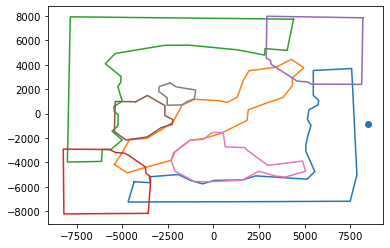

In [21]:
for segment in map_segments:
    plt.plot(*segment.exterior.xy)

plt.scatter(8461.0,-873.0)